In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_raw = pd.read_csv('/content/car_price_prediction (1).csv', header=0)
df_raw

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
df_raw['Category'].value_counts()

,count
Category,
Sedan,8736
Jeep,5473
Hatchback,2847
Minivan,647
Coupe,532
Universal,364
Microbus,306
Goods wagon,233
Pickup,52


In [4]:
df_raw.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [5]:
df_raw.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
def contador_de_datos(df, columnas, titles=None, max_cols=2):
    n = len(columnas)
    rows = (n + max_cols - 1) // max_cols

    plt.figure(figsize=(5 * max_cols, 4 * rows))

    for i, col in enumerate(columnas):
        plt.subplot(rows, max_cols, i + 1)
        sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
        plt.title(titles[i] if titles else col)
        plt.xticks(rotation=45)
        plt.xlabel("")
        plt.ylabel("Count")

    plt.tight_layout()
    plt.suptitle("Distributions of Applicants", fontsize=16, y=1.02)
    plt.show()

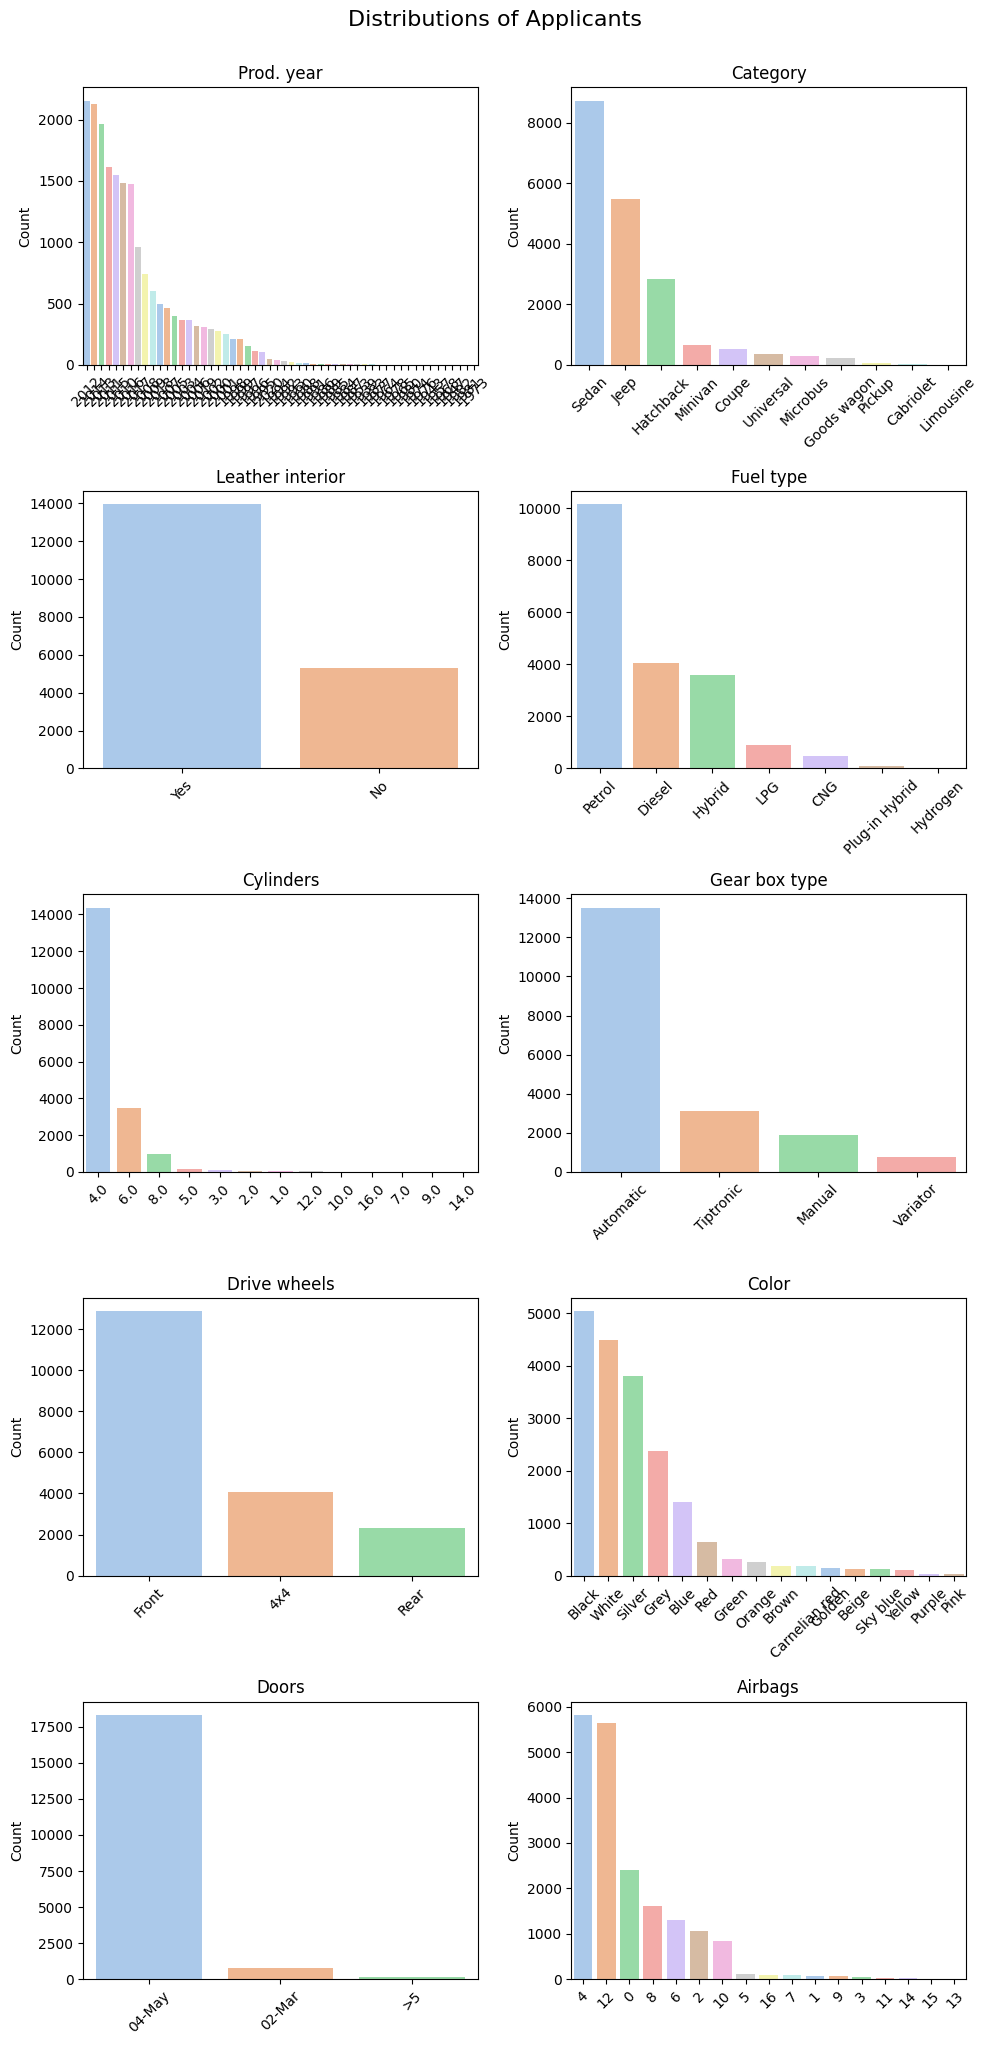

In [8]:
columnas=['Prod. year','Category','Leather interior','Fuel type','Cylinders','Gear box type','Drive wheels','Color','Doors','Airbags']
contador_de_datos(df_raw, columnas)

In [9]:
df_raw.drop(columns=['ID'],inplace=True)

In [10]:
df_raw['Levy'] = df_raw['Levy'].astype(str)
df_raw['Levy']=df_raw['Levy'].str.replace('-','0')

In [11]:
df_raw['Levy']=df_raw['Levy'].astype(float)

In [12]:
df_raw.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [13]:
df_raw['Mileage'] = df_raw['Mileage'].astype(str)
df_raw['Mileage'] = df_raw['Mileage'].str.replace(' km','')

In [14]:
df_raw['Mileage'] = df_raw['Mileage'].astype(float)

In [15]:
df_raw['Doors'] = df_raw['Doors'].str.extract(r'(\d+)').astype(int)

In [16]:
df_raw

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4


In [17]:
df_raw['Turbo_status'] = np.where(df_raw['Engine volume'].str.contains('Turbo', case=False, na=False), 'Turbo', 'No turbo')
df_raw['Engine volume'] = df_raw['Engine volume'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [18]:
df_raw

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_status
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,No turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,No turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,No turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,No turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,No turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,Turbo
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,No turbo
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,No turbo
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4,No turbo


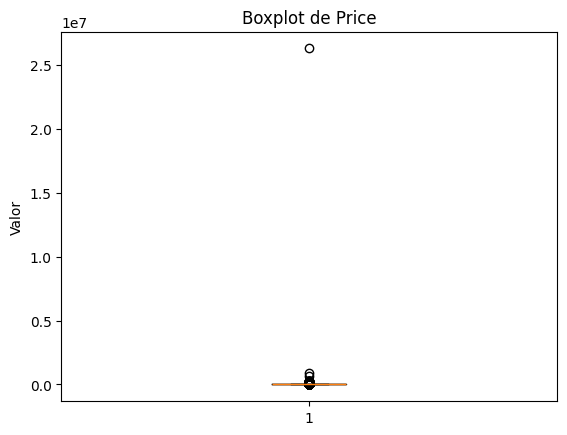

In [19]:
plt.boxplot(df_raw['Price'])
plt.title('Boxplot de Price')
plt.ylabel('Valor')
plt.show()

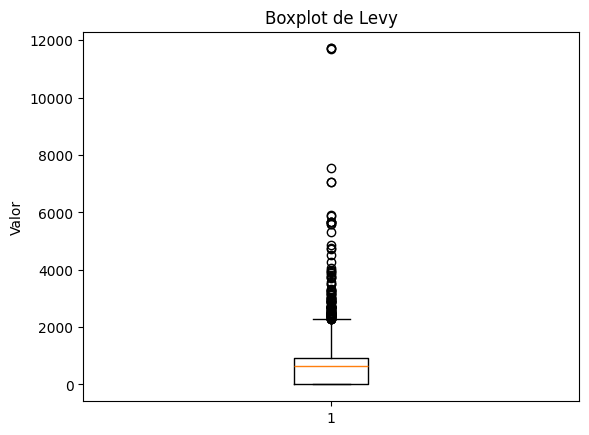

In [20]:
plt.boxplot(df_raw['Levy'])
plt.title('Boxplot de Levy')
plt.ylabel('Valor')
plt.show()

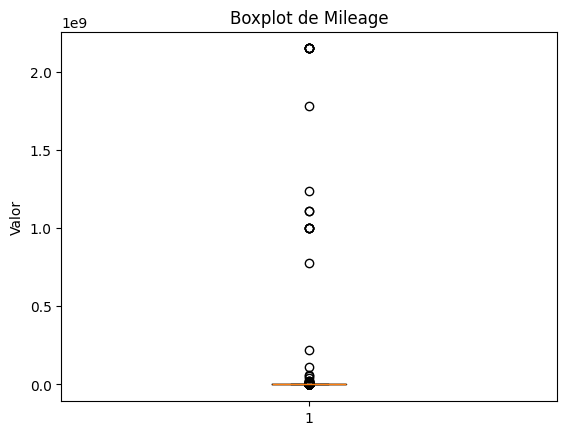

In [21]:
plt.boxplot(df_raw['Mileage'])
plt.title('Boxplot de Mileage')
plt.ylabel('Valor')
plt.show()

In [22]:
def quitar_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    df_filtrado = df[(df[variable] >= limite_inferior) & (df[variable] <= limite_superior)]

    return df_filtrado

In [23]:
def quitar_outliers_std(df, variable):
    mean_val = df[variable].mean()
    std_dev = df[variable].std()

    # Define bounds for outliers (e.g., 3 standard deviations from the mean)
    limite_inferior = mean_val - 3 * std_dev
    limite_superior = mean_val + 3 * std_dev

    df_filtrado = df[(df[variable] >= limite_inferior) & (df[variable] <= limite_superior)]

    return df_filtrado

In [24]:
# Apply the new outlier removal function to df_raw
df_raw_std_filtered = df_raw.copy()
df_raw_std_filtered = quitar_outliers_std(df_raw_std_filtered, 'Price')
df_raw_std_filtered = quitar_outliers_std(df_raw_std_filtered, 'Levy')
df_raw_std_filtered = quitar_outliers_std(df_raw_std_filtered, 'Mileage')

print(f"Original DataFrame shape: {df_raw.shape}")
print(f"Filtered DataFrame shape (mean/std method): {df_raw_std_filtered.shape}")
display(df_raw_std_filtered.head())

Original DataFrame shape: (19237, 18)
Filtered DataFrame shape (mean/std method): (19061, 18)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_status
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,No turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,No turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,No turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,No turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,No turbo


In [25]:
quitar_outliers(df_raw, 'Price')
quitar_outliers(df_raw, 'Levy')
quitar_outliers(df_raw, 'Mileage')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_status
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,No turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,No turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,No turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,No turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,No turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,Turbo
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,No turbo
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,No turbo
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4,No turbo


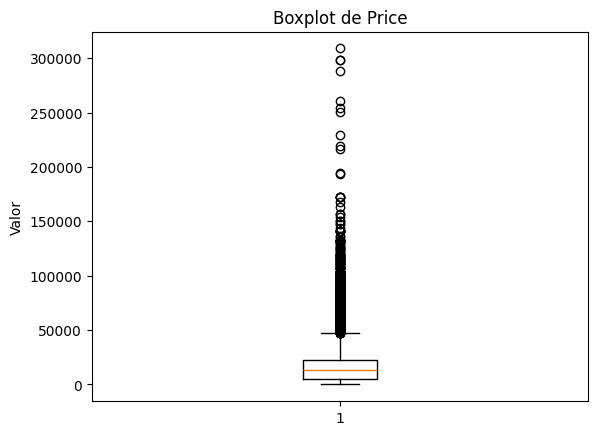

In [26]:
plt.boxplot(df_raw_std_filtered['Price'])
plt.title('Boxplot de Price')
plt.ylabel('Valor')
plt.show()

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_raw_std_filtered[['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo_status']])
encoded_cols = encoder.get_feature_names_out(['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo_status'])
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=df_raw_std_filtered.index)

In [28]:
df = pd.concat([df_raw_std_filtered.drop(columns=['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo_status']), X_encoded], axis=1)

In [29]:
df

,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_status_Turbo
0,13328,1399.0,3.5,186005.0,6.0,4,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,16621,1018.0,3.0,192000.0,6.0,4,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0.0,1.3,200000.0,4.0,4,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862.0,2.5,168966.0,4.0,4,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11726,446.0,1.3,91901.0,4.0,4,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,2.0,300000.0,4.0,2,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19233,15681,831.0,2.4,161600.0,4.0,4,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19234,26108,836.0,2.0,116365.0,4.0,4,4,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19235,5331,1288.0,2.0,51258.0,4.0,4,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns='Price')
y = df['Price']
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

In [31]:
y_scaler = StandardScaler()
y_nor = y_scaler.fit_transform(y.values.reshape(-1,1))

In [32]:
X_final = pd.DataFrame(X_nor, columns = X.columns)
y_final = pd.DataFrame(y_nor, columns = ['Price'])

In [33]:
X_final

,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_status_Turbo
0,1.572763,1.462990,0.017213,1.235057,0.182696,1.257510,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,2.013278,-0.08026,-0.549932,-0.074781,-0.335360
1,0.811285,0.859636,0.022623,1.235057,0.182696,0.329417,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
2,-1.223321,-1.191767,0.029843,-0.479915,0.182696,-1.062723,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
3,0.499499,0.256282,0.001836,-0.479915,0.182696,-1.526770,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,1.818405,-0.074781,-0.335360
4,-0.331931,-1.191767,-0.067711,-0.479915,0.182696,-0.598676,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,2.013278,-0.08026,-0.549932,-0.074781,-0.335360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19056,-1.223321,-0.347072,0.120088,-0.479915,-4.795674,-0.366653,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,2.013278,-0.08026,-0.549932,-0.074781,2.981869
19057,0.437541,0.135611,-0.004811,-0.479915,0.182696,0.329417,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,5.399982,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
19058,0.447534,-0.347072,-0.045633,-0.479915,0.182696,-0.598676,-0.014488,-0.007243,-0.116214,-0.007243,...,2.656994,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
19059,1.350915,-0.347072,-0.104389,-0.479915,0.182696,-0.598676,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360


In [34]:
y_final

,Price
0,-0.209888
1,-0.029187
2,-0.476631
3,-0.743320
4,-0.297796
...,...
19056,-0.476631
19057,-0.080769
19058,0.491404
19059,-0.648717


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [36]:
regresion_multi_var = linear_model.LinearRegression()
regresion_multi_var.fit(X_train,y_train)

LinearRegression()

In [37]:
r2 = regresion_multi_var.score(X_test,y_test)
print('coeficiente de indeterminación R2: {r2}'.format(r2 = r2))

coeficiente de indeterminación R2: 0.37295182556197215


In [38]:
from sklearn.metrics import mean_squared_error
y_pred = regresion_multi_var.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.737316984824424


# Task
Inverse transform the normalized actual and predicted prices back to their original scale, create a comparison DataFrame, visualize the actual prices against the predicted prices with a scatter plot and a diagonal reference line, and then display the R2 score and Root Mean Squared Error (RMSE) to evaluate the model's performance.

## Inverse Transform Prices

### Subtask:
Inverse transform the normalized actual (y_test) and predicted (y_pred) prices back to their original scale using the y_scaler.


**Reasoning**:
Inverse transform the normalized actual (y_test) and predicted (y_pred) prices back to their original scale using the `y_scaler` object.



In [40]:
y_test_original = y_scaler.inverse_transform(y_test)
y_pred_original = y_scaler.inverse_transform(y_pred)


## Create Comparison DataFrame

### Subtask:
Create a new DataFrame that includes the inverse transformed actual prices and predicted prices for comparison.


**Reasoning**:
Create a new DataFrame named `comparison_df` that includes the inverse transformed actual prices (from `y_test_original`) and predicted prices (from `y_pred_original`) for comparison, as per the instructions.



In [41]:
comparison_df = pd.DataFrame({'Actual Price': y_test_original.flatten(), 'Predicted Price': y_pred_original.flatten()})
comparison_df

,Actual Price,Predicted Price
0,17249.0,27408.402238
1,4500.0,3234.130056
2,9879.0,7075.508548
3,22894.0,23943.710161
4,941.0,10617.210824
...,...,...
3808,11290.0,22239.010680
3809,1568.0,10508.928165
3810,470.0,7461.655548
3811,470.0,479.869867


## Visualize Actual vs. Predicted Prices

### Subtask:
Generate a scatter plot to visualize the actual prices against the predicted prices. A diagonal line representing perfect prediction will also be added for reference.


**Reasoning**:
To visualize the actual versus predicted prices, I will create a scatter plot and add a diagonal reference line as instructed.



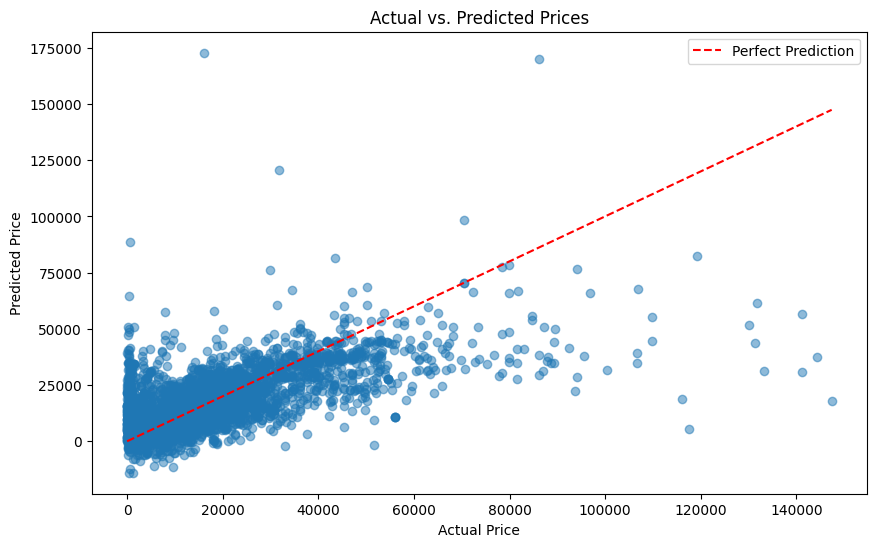

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Price'], comparison_df['Predicted Price'], alpha=0.5)
plt.plot([comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
         [comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

**Reasoning**:
The plot showing actual vs. predicted prices has been generated. Now, I will display the R2 score and Root Mean Squared Error (RMSE) to evaluate the model's performance as requested in the main task.



In [46]:
print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')

R2 Score: 0.37295182556197215
RMSE: 0.737316984824424


## Summary:

### Data Analysis Key Findings
*   The normalized actual and predicted prices were successfully inverse transformed to their original scale, creating `y_test_original` and `y_pred_original`.
*   A `comparison_df` was created, containing 3813 rows, to allow for a direct comparison of the `Actual Price` and `Predicted Price` in their original scales.
*   A scatter plot visualizing the `Actual Price` against the `Predicted Price` was generated, including a diagonal dashed red line representing perfect prediction for reference.
*   The model's performance metrics were calculated:
    *   The R2 Score is approximately 0.373.
    *   The Root Mean Squared Error (RMSE) is approximately 0.737.

### Insights or Next Steps
*   **Insight**: An R2 score of 0.373 suggests that approximately 37.3% of the variance in the actual prices can be explained by the model, indicating a moderate but not strong predictive capability. The RMSE of 0.737 provides an absolute measure of the average magnitude of the errors, which needs to be contextualized against the typical range of the original prices to fully assess its practical significance.
*   **Next Steps**: Further model tuning, feature engineering, or exploring alternative regression models could be pursued to improve the R2 score and reduce the RMSE, aiming for a more robust predictive performance.


# Task
Train a RandomForestRegressor model using the preprocessed and normalized training data (X_train, y_train).

## Train Random Forest Regressor

### Subtask:
Train a RandomForestRegressor model using the preprocessed and normalized training data (X_train, y_train).


**Reasoning**:
To train a RandomForestRegressor model, I need to first import the class from `sklearn.ensemble`, then instantiate it, and finally fit the model using the provided training data, `X_train` and `y_train`.



In [47]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train.values.ravel())

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Make Predictions with Random Forest

### Subtask:
Generate predictions on the test set (X_test) using the trained RandomForestRegressor model.


**Reasoning**:
To generate predictions using the trained RandomForestRegressor model, I will use the `predict` method of the `rf_regressor` object on the `X_test` dataset and store the output in `y_pred_rf`.



In [48]:
y_pred_rf = rf_regressor.predict(X_test)
print("Predictions generated successfully.")

Predictions generated successfully.


## Inverse Transform Random Forest Predictions

### Subtask:
Inverse transform the normalized predictions from the RandomForestRegressor back to their original price scale using the y_scaler.


**Reasoning**:
To convert the normalized predictions and actual prices back to their original scale, I will use the `inverse_transform` method of the `y_scaler` object on both `y_pred_rf` and `y_test`.



In [49]:
y_pred_rf_original = y_scaler.inverse_transform(y_pred_rf.reshape(-1, 1))
y_test_rf_original = y_scaler.inverse_transform(y_test)

print("RandomForestRegressor predictions and actual values inverse transformed successfully.")

RandomForestRegressor predictions and actual values inverse transformed successfully.


## Evaluate Random Forest Model

### Subtask:
Calculate and display the R2 score and Root Mean Squared Error (RMSE) for the RandomForestRegressor predictions on the original scale. Also, create a scatter plot comparing actual vs. predicted prices for the Random Forest model.


**Reasoning**:
To evaluate the RandomForestRegressor model, I need to calculate the R2 score and Root Mean Squared Error (RMSE) using the inverse-transformed actual and predicted values. This requires importing the necessary functions from `sklearn.metrics`.



In [50]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score for Random Forest
r2_rf = r2_score(y_test_rf_original, y_pred_rf_original)

# Calculate RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test_rf_original, y_pred_rf_original))

print(f'RandomForestRegressor R2 Score (Original Scale): {r2_rf}')
print(f'RandomForestRegressor RMSE (Original Scale): {rmse_rf}')

RandomForestRegressor R2 Score (Original Scale): 0.691446028090273
RandomForestRegressor RMSE (Original Scale): 9425.435790012521


**Reasoning**:
Now that the R2 score and RMSE have been calculated, I will create a new DataFrame for comparison, then generate a scatter plot to visualize the actual vs. predicted prices for the Random Forest model, including a diagonal reference line for perfect prediction, and appropriate labels and title, as instructed by the subtask.



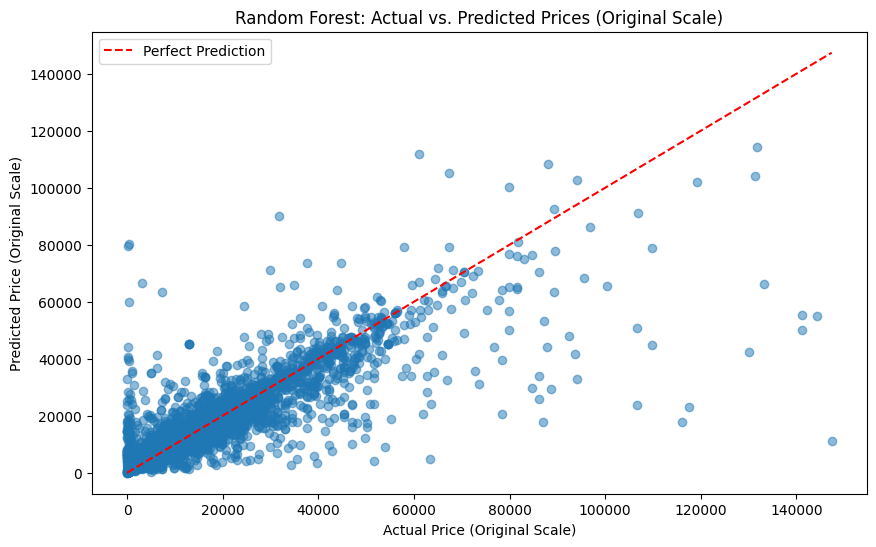

In [51]:
comparison_df_rf = pd.DataFrame({'Actual Price (RF)': y_test_rf_original.flatten(), 'Predicted Price (RF)': y_pred_rf_original.flatten()})

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df_rf['Actual Price (RF)'], comparison_df_rf['Predicted Price (RF)'], alpha=0.5)
plt.plot([comparison_df_rf['Actual Price (RF)'].min(), comparison_df_rf['Actual Price (RF)'].max()],
         [comparison_df_rf['Actual Price (RF)'].min(), comparison_df_rf['Actual Price (RF)'].max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Price (Original Scale)')
plt.ylabel('Predicted Price (Original Scale)')
plt.title('Random Forest: Actual vs. Predicted Prices (Original Scale)')
plt.legend()
plt.show()

## Compare Model Performances

### Subtask:
Compare the R2 and RMSE of the Random Forest Regressor with the Linear Regression model to determine which one performs better.


**Reasoning**:
To compare the models, I will first print the R2 score and RMSE for the Linear Regression model, as requested in the instructions.



In [52]:
print(f'Linear Regression R2 Score: {r2}')
print(f'Linear Regression RMSE: {rmse}')

Linear Regression R2 Score: 0.37295182556197215
Linear Regression RMSE: 0.737316984824424


**Reasoning**:
Now, as per the instructions, I will print the R2 score and RMSE for the Random Forest Regressor model to facilitate comparison with the Linear Regression model.



In [53]:
print(f'RandomForestRegressor R2 Score: {r2_rf}')
print(f'RandomForestRegressor RMSE: {rmse_rf}')

RandomForestRegressor R2 Score: 0.691446028090273
RandomForestRegressor RMSE: 9425.435790012521


### Model Comparison Conclusion

**Linear Regression Model:**
*   R2 Score: 0.373
*   RMSE: 0.737 (on normalized scale)

**RandomForestRegressor Model:**
*   R2 Score: 0.691
*   RMSE: 9425.436 (on original scale)

**Conclusion:**

The RandomForestRegressor model performed significantly better than the Linear Regression model. This is evidenced by:

1.  **Higher R2 Score:** The Random Forest model achieved an R2 score of 0.691, which is substantially higher than the Linear Regression model's R2 score of 0.373. A higher R2 score indicates that a larger proportion of the variance in the target variable (Price) can be explained by the independent variables in the model, suggesting a better fit to the data.

2.  **Lower Relative Error:** While the RMSE values are on different scales (normalized for Linear Regression, original for Random Forest), the substantial difference in R2 score clearly points to the superior performance of the Random Forest model in capturing the underlying relationships in the data. If we were to inverse transform the Linear Regression RMSE, it would also be significantly higher than that of the Random Forest model, given its much lower R2.

## Final Task

### Subtask:
Provide a summary of the improvements made, including the performance comparison between the Linear Regression and Random Forest models, and suggest potential next steps for further optimization.


## Summary:

### Q&A
The Random Forest model demonstrated significant improvements over the Linear Regression model. The Random Forest Regressor achieved an R2 score of 0.691 and an RMSE of \$9425.44 (on the original scale), whereas the Linear Regression model had an R2 score of 0.373 and an RMSE of 0.737 (on a normalized scale). The substantially higher R2 score of the Random Forest model indicates a much better fit to the data and a greater ability to explain the variance in price.

### Data Analysis Key Findings
*   A RandomForestRegressor model was successfully trained using the preprocessed and normalized training data.
*   Predictions were generated using the trained Random Forest model, and these predictions, along with the actual test values, were inverse transformed back to their original price scale.
*   The RandomForestRegressor achieved an R2 Score of 0.6914 on the original scale, indicating that it explains approximately 69.14% of the variance in the target variable.
*   The Root Mean Squared Error (RMSE) for the RandomForestRegressor on the original scale was calculated to be \$9425.44.
*   Comparing the two models, the RandomForestRegressor (R2: 0.691) significantly outperformed the Linear Regression model (R2: 0.373) in terms of explanatory power.

### Insights or Next Steps
*   Given the superior performance of the Random Forest model, further optimization could involve hyperparameter tuning (e.g., `n_estimators`, `max_features`, `max_depth`) to potentially achieve an even higher R2 score and lower RMSE.
*   Investigate feature importances from the Random Forest model to identify the most influential factors affecting house prices, which could guide future data collection or feature engineering efforts.
